In [3]:
import matplotlib.pyplot as plt
import numpy as np
import copy

# Exercise 3

In [ ]:
def func(x):
  return x**2
def get_gradient(x, func, delta=1e-10):
  return (func(x+delta) - func(x))/delta
def plot_func(func, fig):
  x = np.linspace(-2,2, 100)
  y = func(x)
  fig.plot(x,y, alpha = 0.5)
def gradient_descent(func, alpha=0.1, max_iter=200, delta=1e-8, rd_x = np.random.randn()):
  x_hist = [rd_x]
  count=0
  while count<200:
    new_x = rd_x - alpha*get_gradient(rd_x, func)
    x_hist.append(new_x)
    if abs(new_x - rd_x) < delta:
      break
    else:
      rd_x = copy.copy(new_x)
      count+=1
  return np.round(new_x, decimals=5), x_hist

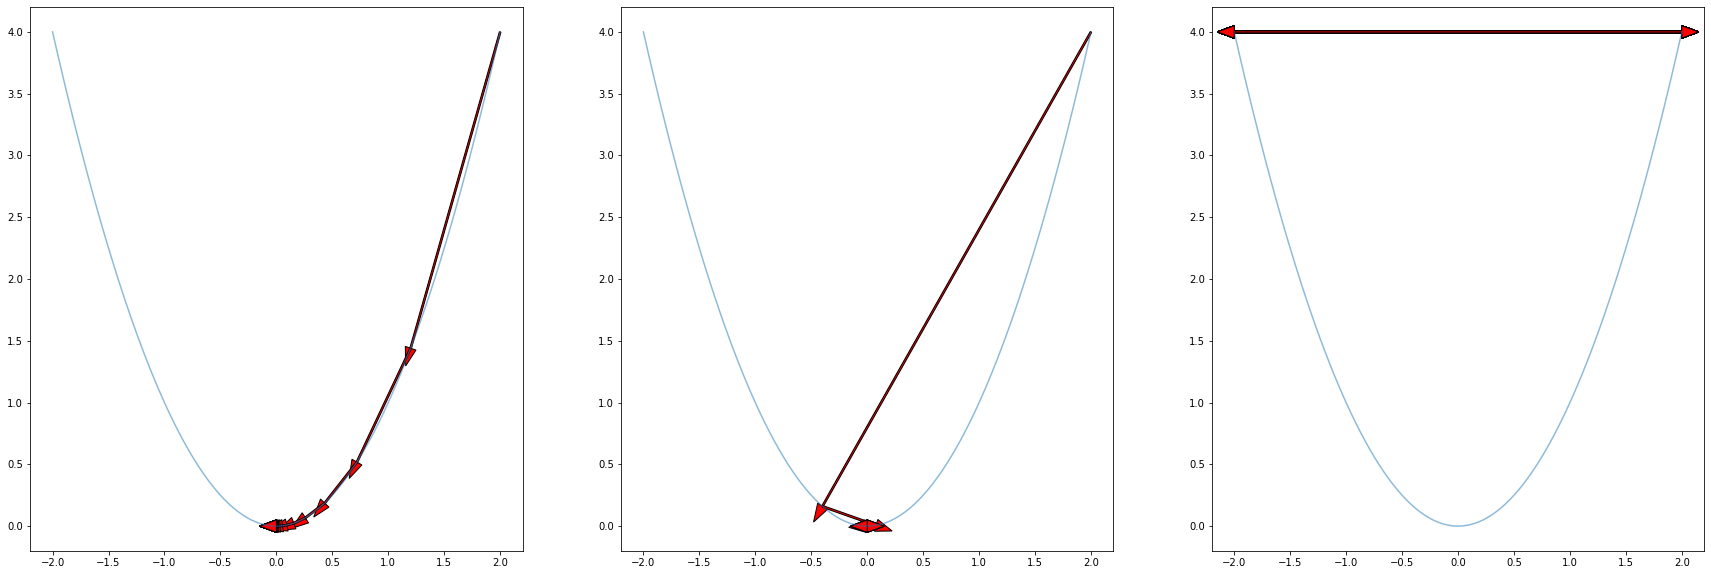

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
alpha_list = [0.2, 0.6, 1]
for index, ax in enumerate(ax):
  plot_func(func, ax)
  point, x_hist = gradient_descent(func, alpha=alpha_list[index])
  for a,b in zip(x_hist[:-1], x_hist[1:]):
    ax.arrow(a, func(a), b-a, func(b)-func(a), fc='r',
           width = 0.015, head_width = 0.1, head_length = 0.15)

# Exercise 4

In [5]:
df = np.genfromtxt('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv', delimiter=',', skip_header=True)

In [6]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [7]:
class LogisticRegression:
    def __init__(self, alpha=0.1, max_iter=3000, delta=1e-3):
        self.alpha = alpha
        self.max_iter = max_iter
        self.delta = delta

    def gradient_func(self, X, t, weight):
      return np.dot(X.T, sigmoid(np.dot(X, weight.T)).reshape((20,)) - t)

    def fit(self, X, t):
      self.X = np.c_[np.ones(X.shape[0]), X]
      weight = np.random.randn(1, self.X.shape[1])

      count = 0
      while count < self.max_iter:
          new_weight = weight -  self.alpha*self.gradient_func(self.X, t, weight)
          if np.all(abs(new_weight - weight) < self.delta):
              break
          else:
              weight = new_weight.copy()
              count += 1

      self.weight = new_weight

    def predict_proba(self, X=None):
      if X is not None:
        X = np.c_[np.ones(X.shape[0]), X]
        return sigmoid(np.dot(X, self.weight.T)).reshape(X.shape[0],)
      return sigmoid(np.dot(self.X, self.weight.T)).reshape(self.X.shape[0],)

    def predict(self, X=None):
      proba = self.predict_proba(X)
      return np.where(proba>=0.5, 1, 0)

In [8]:
x = LogisticRegression(alpha=0.002)
x.fit(df[:,:-1], df[:,-1])
label = x.predict()

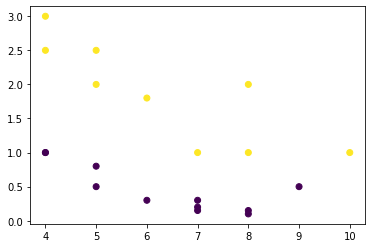

In [13]:
plt.scatter(df[:,0], df[:,1], c=label)

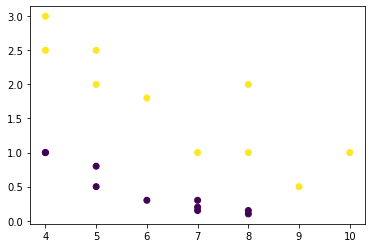

In [84]:
plt.scatter(df[:,0], df[:,1], c=df[:,2])

In [14]:
new = np.array([[2,3],
               [1,8],
               [5,5]])
x.predict(new)

array([1, 1, 1])